In [1]:
pip install skits

Libraries which are used are listed below:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
import warnings
import math
import pickle
from scipy.stats import kruskal
from scipy.stats import pearsonr
from scipy.stats import randint 
from scipy.stats import uniform
from scipy.stats import chi2_contingency
from scipy.stats import boxcox

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.linear_model import SGDClassifier
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

from datetime import datetime
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import  adfuller
from statsmodels.tsa.stattools import  kpss
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from collections import defaultdict
from collections import OrderedDict
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.base import RegressorMixin
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.decomposition import PCA
from statsmodels.tsa.ar_model import AR
from skits.feature_extraction import AutoregressiveTransformer
from skits.preprocessing import ReversibleImputer
from sklearn.linear_model import LinearRegression
import xgboost as xgb


%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Importing the merged data set which has been created in the other python file: Merged all the bike data set along with the weather and the holidays dataset reulted in the below dataset

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/sravansaii/DATA602-Bikesharing-Analysis/main/mergeddataset.txt')
df

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
0,2011-01-01,NaN,-1.566667,11.973333,2.772727,0.069333,2.575000,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,330.0,629.0,959.0,NaN
1,2011-01-02,NaN,0.880000,13.806667,7.327273,1.037349,3.925000,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,130.0,651.0,781.0,NaN
2,2011-01-03,NaN,-3.442857,7.464286,-3.060000,1.878824,3.625000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,120.0,1181.0,1301.0,NaN
3,2011-01-04,NaN,-5.957143,4.642857,-3.100000,0.000000,1.800000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,107.0,1429.0,1536.0,NaN
4,2011-01-05,NaN,-4.293333,6.113333,-1.772727,0.000000,2.950000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,82.0,1489.0,1571.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2018-12-27,3.500000,-3.591667,9.125000,-1.055556,0.024096,2.100000,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1150.0,4280.0,5430.0,NaN
2918,2018-12-28,8.233333,0.608333,11.208333,8.088889,16.843820,2.000000,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,166.0,1959.0,2125.0,NaN
2919,2018-12-29,9.500000,3.925000,12.416667,5.311111,11.550575,3.666667,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1756.0,4252.0,6008.0,NaN
2920,2018-12-30,4.800000,0.816667,11.066667,2.088889,0.104651,1.200000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1295.0,3634.0,4929.0,NaN


In [4]:

df.describe()

,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,wt_sleet,...,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
count,2101.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,1503.0,208.0,694.0,129.0,...,5.0,84.0,36.0,10.0,4.0,1.0,2918.000000,2918.000000,2918.000000,89.0
mean,14.419007,8.506468,19.015689,11.069243,3.435734,3.162898,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1679.776217,6046.297121,7726.073338,1.0
std,9.556401,9.473941,9.835524,9.481232,8.183658,1.379582,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1560.762932,2756.888032,3745.220092,0.0
min,-12.100000,-16.993750,-7.980000,-15.658333,0.000000,0.375000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,19.000000,21.000000,1.0
25%,6.566667,0.516538,11.081562,3.013068,0.005510,2.200000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,512.250000,3839.250000,4628.500000,1.0
50%,15.433333,8.504911,19.992857,11.619091,0.271504,2.900000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1220.500000,5964.000000,7442.500000,1.0
75%,23.066667,17.338393,27.874583,19.767083,2.885381,3.875000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2357.250000,8187.500000,10849.500000,1.0
max,31.733333,26.206250,37.850000,28.666667,118.789796,12.750000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,10173.000000,15419.000000,19113.000000,1.0


In [5]:
#  datatypes 
df.dtypes

date                  object
temp_avg             float64
temp_min             float64
temp_max             float64
temp_observ          float64
precip               float64
wind                 float64
wt_fog               float64
wt_heavy_fog         float64
wt_thunder           float64
wt_sleet             float64
wt_hail              float64
wt_glaze             float64
wt_haze              float64
wt_drift_snow        float64
wt_high_wind         float64
wt_mist              float64
wt_drizzle           float64
wt_rain              float64
wt_freeze_rain       float64
wt_snow              float64
wt_ground_fog        float64
wt_ice_fog           float64
wt_freeze_drizzle    float64
wt_unknown           float64
casual               float64
registered           float64
total_cust           float64
holiday              float64
dtype: object

In [6]:
#missing values
df.isnull().sum()

date                    0
temp_avg              821
temp_min                0
temp_max                0
temp_observ             0
precip                  0
wind                    0
wt_fog               1419
wt_heavy_fog         2714
wt_thunder           2228
wt_sleet             2793
wt_hail              2872
wt_glaze             2769
wt_haze              2217
wt_drift_snow        2915
wt_high_wind         2664
wt_mist              2551
wt_drizzle           2794
wt_rain              2516
wt_freeze_rain       2917
wt_snow              2838
wt_ground_fog        2886
wt_ice_fog           2912
wt_freeze_drizzle    2918
wt_unknown           2921
casual                  4
registered              4
total_cust              4
holiday              2833
dtype: int64

In [7]:
#NAs with 0
feats = [x for x in df.columns if 'wt' in x]
df['holiday'] = df['holiday'].fillna(0)
df[feats] = df[feats].fillna(0)

In [8]:
missing = df[df['total_cust'].isna()]
missing

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
1848,2016-01-23,-4.366667,-6.128571,-2.392857,-4.688889,42.045946,8.08,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
1849,2016-01-24,-2.666667,-7.985714,-1.028571,-6.366667,19.339130,3.75,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
1850,2016-01-25,-5.133333,-11.128571,2.028571,-9.877778,0.000000,1.15,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
1851,2016-01-26,2.333333,-7.871429,7.471429,3.588889,0.000000,2.85,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0


In [9]:
# filling the missing values in the customer variables with forward fill method
df[['total_cust', 'casual', 'registered']] = df[['total_cust', 'casual', 'registered']].fillna(method='ffill')
df.isnull().sum()

date                   0
temp_avg             821
temp_min               0
temp_max               0
temp_observ            0
precip                 0
wind                   0
wt_fog                 0
wt_heavy_fog           0
wt_thunder             0
wt_sleet               0
wt_hail                0
wt_glaze               0
wt_haze                0
wt_drift_snow          0
wt_high_wind           0
wt_mist                0
wt_drizzle             0
wt_rain                0
wt_freeze_rain         0
wt_snow                0
wt_ground_fog          0
wt_ice_fog             0
wt_freeze_drizzle      0
wt_unknown             0
casual                 0
registered             0
total_cust             0
holiday                0
dtype: int64

In [10]:
# function to create seasons for dataframe
def seasons(df):
    
    df['season_spring'] = df['date'].apply(lambda x: 1 if '01' in x[5:7] else 1 if '02' in x[5:7] else 1 
                                                     if '03' in x[5:7] else 0)
    df['season_summer'] = df['date'].apply(lambda x: 1 if '04' in x[5:7] else 1 if '05' in x[5:7] else 1 
                                                     if '06' in x[5:7] else 0)
    df['season_fall'] = df['date'].apply(lambda x: 1 if '07' in x[5:7] else 1 if '08' in x[5:7] else 1 
                                                     if '09' in x[5:7] else 0)
    
    return df

df = seasons(df)
df['date_datetime'] = df['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

df['weekday'] = df['date_datetime'].apply(lambda x: x.weekday())

In [11]:
weekday_dummies = pd.get_dummies(df['weekday'], prefix='weekday', drop_first=True)
df = df.join(weekday_dummies, how='left')
df.head()

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,season_summer,season_fall,date_datetime,weekday,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2011-01-01,NaN,-1.566667,11.973333,2.772727,0.069333,2.575,1.0,0.0,0.0,...,0,0,2011-01-01,5,0,0,0,0,1,0
1,2011-01-02,NaN,0.880000,13.806667,7.327273,1.037349,3.925,1.0,1.0,0.0,...,0,0,2011-01-02,6,0,0,0,0,0,1
2,2011-01-03,NaN,-3.442857,7.464286,-3.060000,1.878824,3.625,0.0,0.0,0.0,...,0,0,2011-01-03,0,0,0,0,0,0,0
3,2011-01-04,NaN,-5.957143,4.642857,-3.100000,0.000000,1.800,0.0,0.0,0.0,...,0,0,2011-01-04,1,1,0,0,0,0,0
4,2011-01-05,NaN,-4.293333,6.113333,-1.772727,0.000000,2.950,0.0,0.0,0.0,...,0,0,2011-01-05,2,0,1,0,0,0,0


In [12]:
###feature working_day
df['working_day'] = df['weekday'].apply(lambda x: 0 if x > 5 or x == 0 else 1)
df['working_day'] = df[['holiday', 'working_day']].apply(
    lambda x: 0 if x['holiday'] == 1 else x['working_day'], axis=1)

In [13]:
# Dropping date, registered and casual features
df.drop(columns=['date', 'temp_avg', 'registered', 'casual'], inplace=True)

##Exploratory Data Analysis
##Categorical variables
##Season

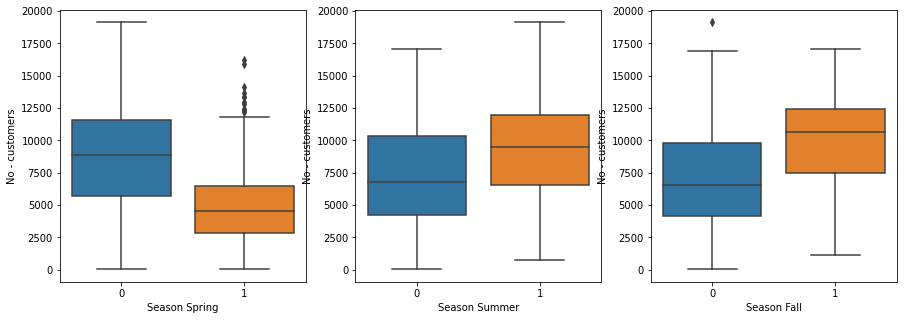

In [14]:
# variable 
season_names = ['spring', 'summer', 'fall']

# plot boxplots
plt.figure(figsize = [15, 5])

# boxplot workingday
plt.subplot(1, 3, 1)
sb.boxplot(data = df, x = 'season_spring', y = 'total_cust')
plt.xlabel('Season Spring')
plt.ylabel('No - customers')

# boxplot weekday
plt.subplot(1, 3, 2)
sb.boxplot(data = df, x = 'season_summer', y = 'total_cust')
plt.xlabel('Season Summer')
plt.ylabel('No - customers')

# boxplot holiday
plt.subplot(1, 3, 3)
sb.boxplot(data = df, x = 'season_fall', y = 'total_cust')
plt.xlabel('Season Fall')
plt.ylabel('No - customers');

Holiday


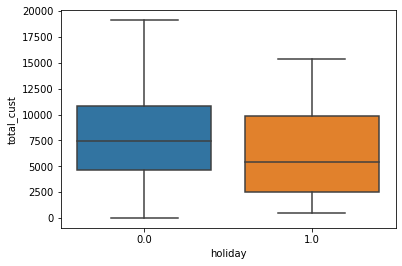

In [15]:
#boxplot for the holiday feature
sb.boxplot(data = df, x = 'holiday', y = 'total_cust');

##Weekday

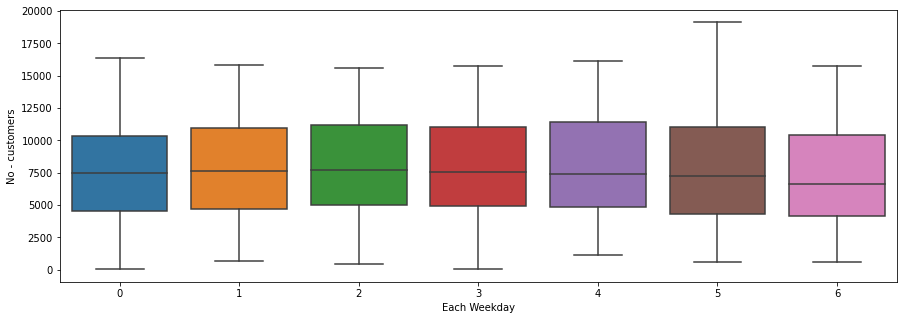

In [16]:
#boxplot for the weekday feature
plt.figure(figsize = [15, 5])
sb.boxplot(data = df, x = 'weekday', y = 'total_cust')
plt.xlabel('Each Weekday')
plt.ylabel('No - customers');

##workingday

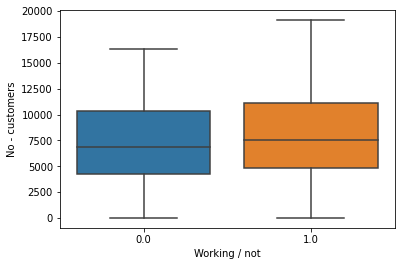

In [17]:
#workday count of customers
sb.boxplot(data = df, x = 'working_day', y = 'total_cust')
plt.xlabel('Working / not')
plt.ylabel('No - customers');

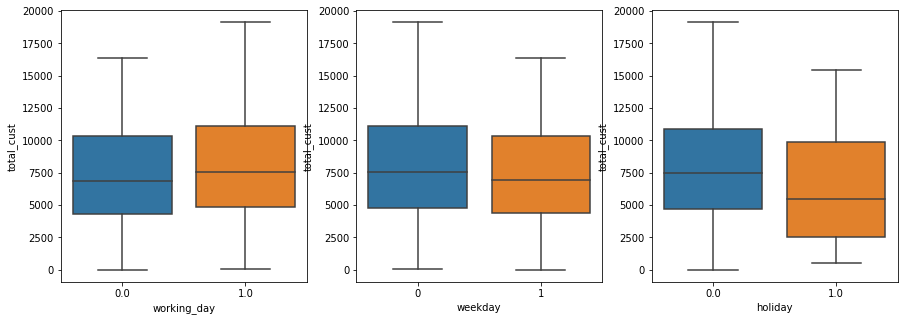

In [18]:
#new dataframe encodes
#1-saturday and sunday
weekend_distinct = df.copy()
weekend_distinct['weekday'] = weekend_distinct['weekday'].apply(lambda x: 1 if (x == 6 or x == 0) else 0)

plt.figure(figsize = [15, 5])

# boxplot  workingday
plt.subplot(1, 3, 1)
sb.boxplot(data =df, x = 'working_day', y = 'total_cust');

# boxplot weekday
plt.subplot(1, 3, 2)
sb.boxplot(data = weekend_distinct, x = 'weekday', y = 'total_cust');

# boxplot  holiday
plt.subplot(1, 3, 3)
sb.boxplot(data = df, x = 'holiday', y = 'total_cust');

In [19]:
#  workingday mean
df.groupby('working_day')['total_cust'].mean()

working_day
0.0    7262.673563
1.0    7913.302144
Name: total_cust, dtype: float64

In [20]:
#weekday mean
weekend_distinct.groupby('weekday')['total_cust'].mean()

weekday
0    7878.716203
1    7322.511962
Name: total_cust, dtype: float64

In [21]:
# holiday mean
df.groupby('holiday')['total_cust'].mean()

holiday
0.0    7771.698200
1.0    6060.685393
Name: total_cust, dtype: float64

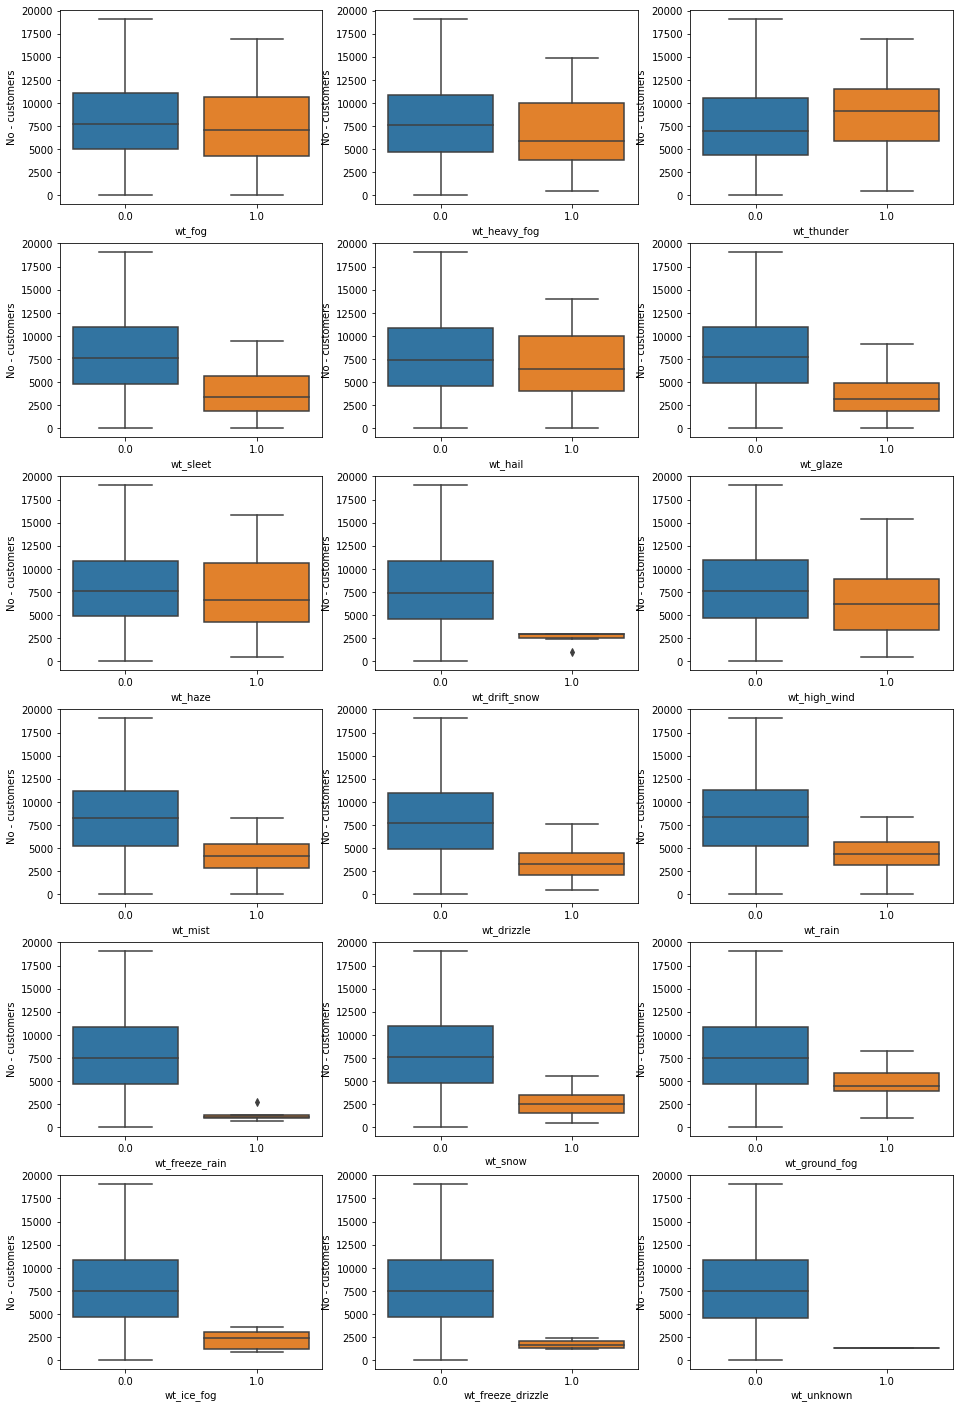

In [26]:
#revenue
fig, ax = plt.subplots(6, 3, figsize = [16, 25])

# list creation 
wt_feat = [x for x in df.columns if 'wt_' in x]

# company counter
counter = 0

for j in range(len(ax)):
    for i in range(len(ax[j])):
        if j == 5 and i == 3:
            break
        else:
            ax[j][i] = sb.boxplot(data = df, x = wt_feat[counter], y = 'total_cust', ax=ax[j][i])
            ax[j][i].set_ylabel('No - customers')
            ax[j][i].set_xlabel(wt_feat[counter])
            counter += 1

In [27]:

df['fog'] = df['wt_fog'] + df['wt_heavy_fog'] + df['wt_hail'] + df['wt_haze'] + df['wt_high_wind']
df['fog'] = df['fog'].apply(lambda x: 0 if x == 0 else 1)
df['thunder'] = df['wt_thunder']
df['ice'] = df['wt_ice_fog'] + df['wt_unknown'] + df['wt_freeze_drizzle'] + df['wt_freeze_rain'] + df['wt_drift_snow']
df['ice'] = df['ice'].apply(lambda x: 0 if x == 0 else 1)
df['sleet'] = df['wt_sleet'] + df['wt_glaze'] +df['wt_snow']
df['sleet'] = df['sleet'].apply(lambda x: 0 if x == 0 else 1)
df['rain'] =df['wt_mist'] + df['wt_drizzle'] + df['wt_rain'] + df['wt_ground_fog']
df['rain'] =df['rain'].apply(lambda x: 0 if x == 0 else 1)

In [28]:
# drop old wt features
df.drop(columns=wt_feat, inplace=True)

In [ ]:
# boxplots for comparison between the new weather type features and target
plt.figure(figsize = [12, 10])

# boxplot for fog
plt.subplot(2, 2, 1)
sb.boxplot(data = df, x = 'fog', y = 'total_cust')
plt.xlabel('Foggy Weather')
plt.ylabel('Customers')

# boxplot for thunder
plt.subplot(2, 2, 2)
sb.boxplot(data = df, x = 'thunder', y = 'total_cust')
plt.xlabel('Thunder Weather')
plt.ylabel('Customers')

# boxplot for ice
plt.subplot(2, 2, 3)
sb.boxplot(data = df, x = 'ice', y = 'total_cust')
plt.xlabel('Icy Weather')
plt.ylabel('Customers')

# boxplot for  sleet
plt.subplot(2, 2, 4)
sb.boxplot(data = df, x = 'sleet', y = 'total_cust')
plt.xlabel('Sleet Weather')
plt.ylabel('Customers');

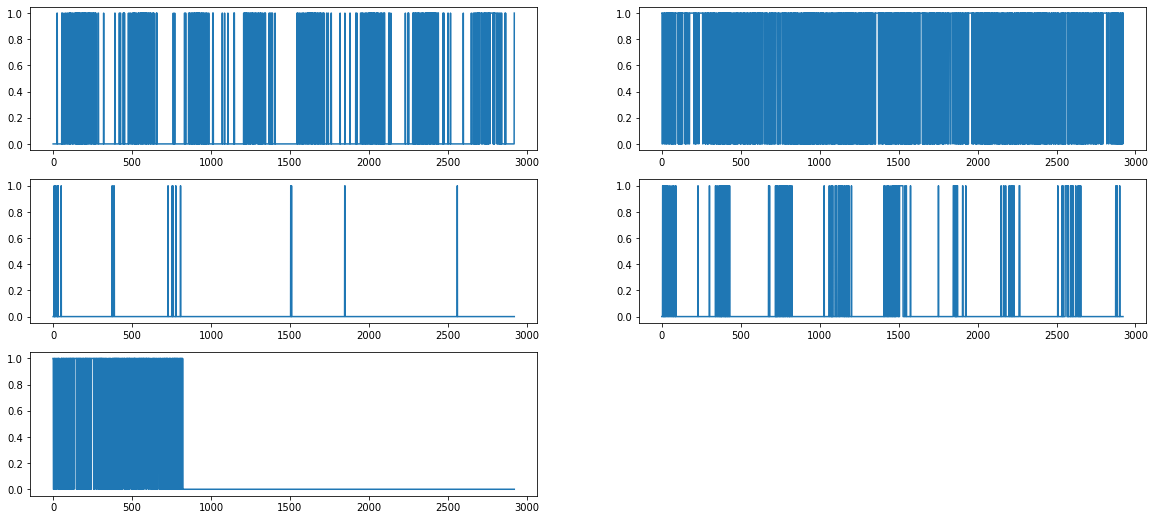

In [33]:
# plotting all newly created features
plt.figure(figsize=[20,9])

plt.subplot(3,2,1)
plt.plot(df['thunder'])

plt.subplot(3, 2, 2)
plt.plot(df['fog'])

plt.subplot(3, 2, 3)
plt.plot(df['ice'])

plt.subplot(3, 2, 4)
plt.plot(df['sleet'])

plt.subplot(3, 2, 5)
plt.plot(df['rain'])

In [34]:
df.drop(columns=['rain'], inplace=True)

In [35]:
# drop non-categorical variables
bike_df_corr_cat = df.drop(columns=['date_datetime', 'weekday', 'temp_min', 'temp_max','temp_observ', 'precip', 'wind', 'total_cust'], axis=1)

##Categorical Variable

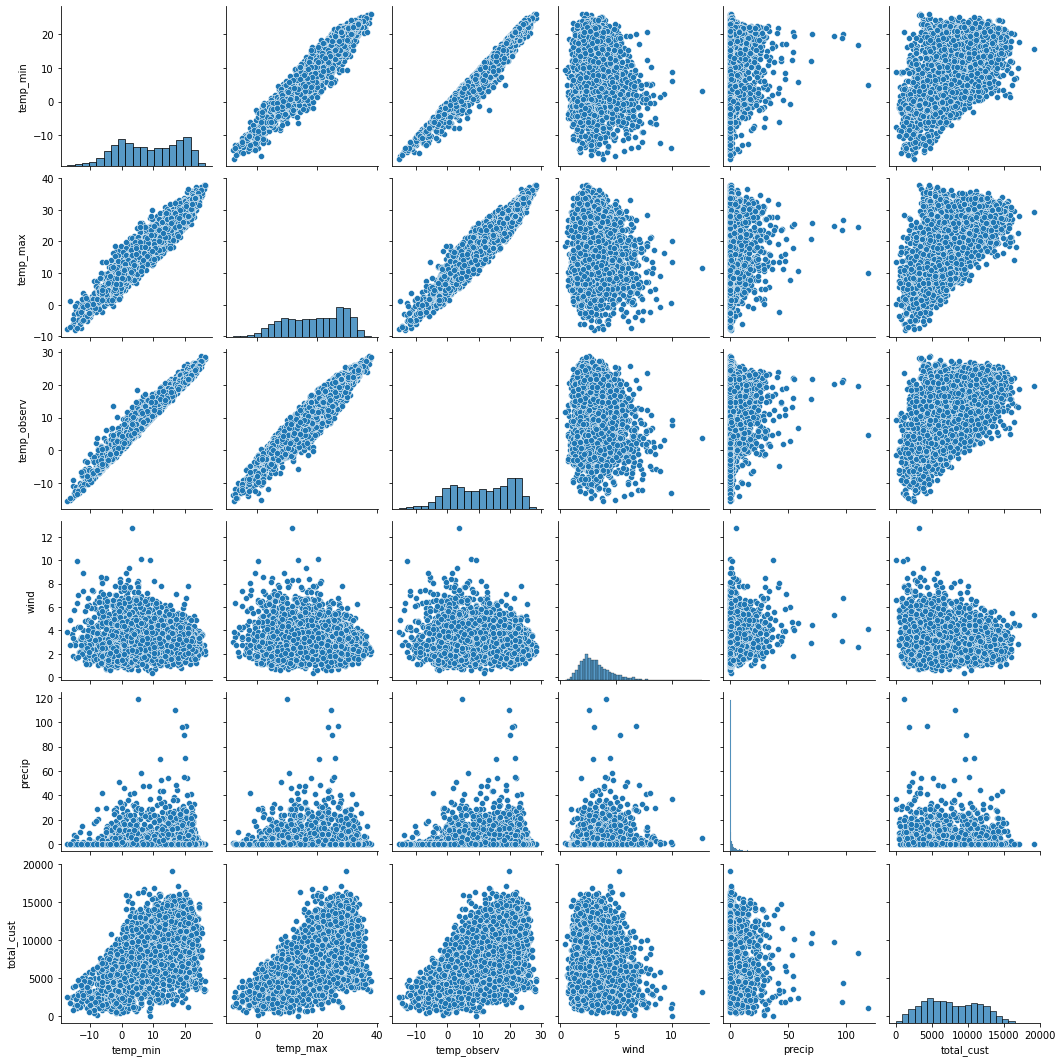

In [36]:
# plot
sb.pairplot(df, vars=['temp_min', 'temp_max', 'temp_observ', 'wind', 'precip', 'total_cust']);

##Total Customers

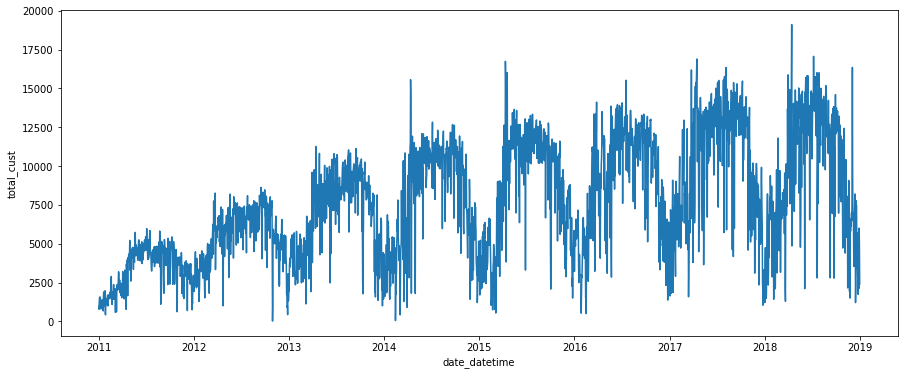

In [37]:
# plot the overall total_cust values for entire timeseries
plt.figure(figsize=[15,6])
ax = sb.lineplot(x='date_datetime', y='total_cust', data=df)

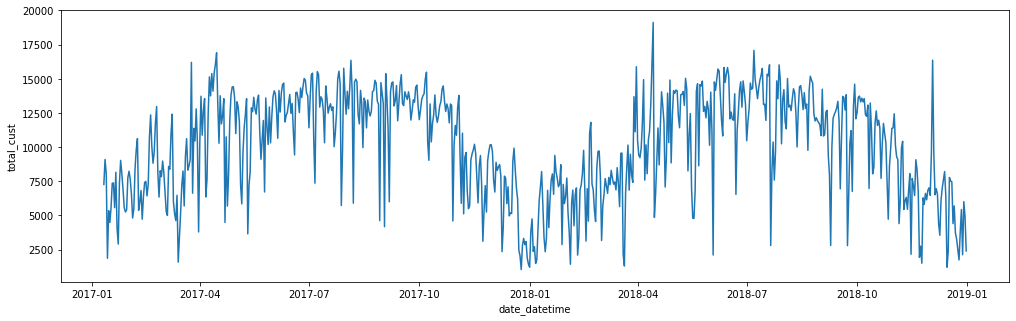

In [39]:
# plot only last two years of timeseries
plt.figure(figsize=[17,5])
ax = sb.lineplot(x='date_datetime', y='total_cust', data=df[-720:])

In [40]:
#  t-1
df['total_cust_t-1'] =df['total_cust'].shift()

##temp_max

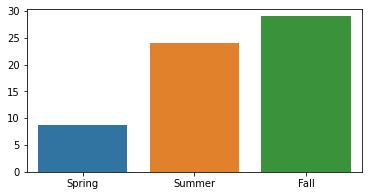

In [47]:
# grouping mean temperature per season
tmp_spring =df.groupby('season_spring')['temp_max'].mean().rename({1: 'Spring'})
tmp_summer = df.groupby('season_summer')['temp_max'].mean().rename({1: 'Summer'})
tmp_fall = df.groupby('season_fall')['temp_max'].mean().rename({1: 'Fall'})

# drop the rows with index 0
tmp_seasons = tmp_spring.append(tmp_summer).append(tmp_fall)
tmp_seasons.drop(labels=[0], inplace=True)
# plot 
plt.figure(figsize=[6,3])
sb.barplot(x=tmp_seasons.index, y=tmp_seasons.values);

<Figure size 1080x504 with 0 Axes>

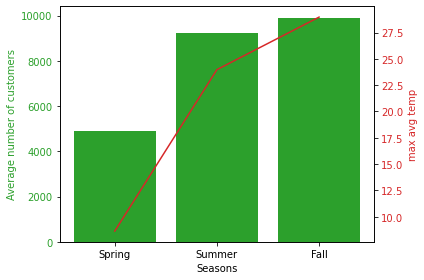

In [50]:
#Grouping average users per season
cust_spring = df.groupby('season_spring')['total_cust'].mean().rename({1: 'Spring'})
cust_summer = df.groupby('season_summer')['total_cust'].mean().rename({1: 'Summer'})
cust_fall = df.groupby('season_fall')['total_cust'].mean().rename({1: 'Fall'})
cust_seasons = cust_spring.append(cust_summer).append(cust_fall)
cust_seasons.drop(labels=[0], inplace=True)
x = list(tmp_seasons.index)
y1 = cust_seasons.values
y2 = tmp_seasons.values
plt.figure(figsize=[15,7])
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()  

color1 = 'tab:green'
ax1.set_xlabel('Seasons')
ax1.set_ylabel('Average number of customers', color=color1)
ax1.bar(x, y1, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

color2 = 'tab:red'
ax2.set_ylabel('max avg temp', color=color2)
ax2.plot(x, y2, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()
plt.show()

From the graph temperature strongly determines the number of customers. The temperature is likely a very important feature for predicting the target variable.

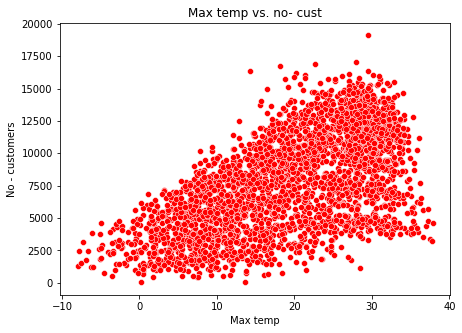

In [51]:
# plot of temp feature vs total_cust
plt.figure(figsize=[7,5])
sb.scatterplot(data = df, x = 'temp_max', y = 'total_cust', color='red')
plt.xlabel('Max temp')
plt.ylabel('No - customers')
plt.title('Max temp vs. no- cust');

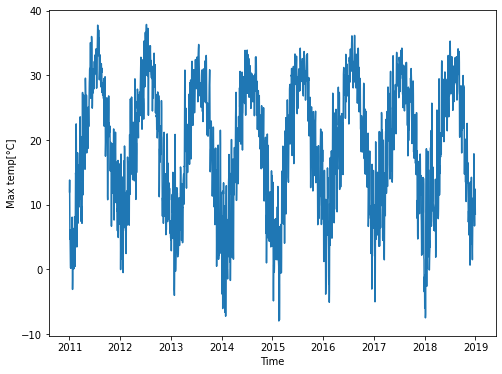

In [53]:
# plot of temp_max values for the entire time 
plt.figure(figsize=[8,6])
ax = sb.lineplot(x='date_datetime', y='temp_max', data=df)
plt.ylabel('Max temp[°C]')
plt.xlabel('Time');

##temp_min

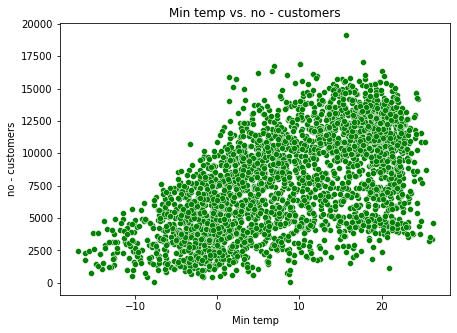

In [55]:
# plott of temp_min against the target label
plt.figure(figsize=[7,5])

sb.scatterplot(data = df, x = 'temp_min', y = 'total_cust', color='green')
plt.xlabel('Min temp')
plt.ylabel('no - customers')
plt.title('Min temp vs. no - customers');

In [56]:
# new features
df_cat = df.copy()
df_cat['very_cold'] = df_cat['temp_max'].apply(lambda x: 1 if x < 0 else 0)
df_cat['cold'] = df_cat['temp_max'].apply(lambda x: 1 if x < 10 and x >= 0 else 0)
df_cat['cool'] = df_cat['temp_max'].apply(lambda x: 1 if x < 20 and x >= 10 else 0)
df_cat['warm'] = df_cat['temp_max'].apply(lambda x: 1 if x < 30 and x >= 20 else 0)
df_cat['hot'] = df_cat['temp_max'].apply(lambda x: 1 if x >= 30 else 0)

df_cat[['very_cold', 'cold', 'cool', 'warm', 'hot']] = df_cat[['very_cold', 'cold', 'cool', 'warm', 'hot']].shift()


df_cat =df_cat.iloc[1:,:]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0, 0.5, 'No of customers')

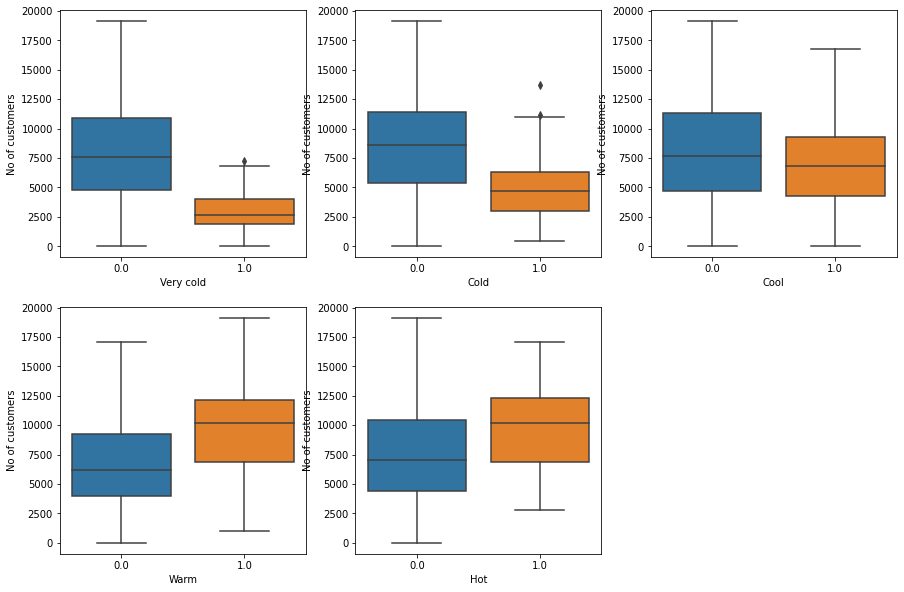

In [58]:
# plot of categorized temperature
plt.figure(figsize=[15,10])
plt.subplot(2,3,1)
sb.boxplot(df_cat['very_cold'], df_cat['total_cust'])
plt.xlabel('Very cold')
plt.ylabel('No of customers')

plt.subplot(2,3,2)
sb.boxplot(df_cat['cold'], df_cat['total_cust'])
plt.xlabel('Cold')
plt.ylabel('No of customers')

plt.subplot(2,3,3)
sb.boxplot(df_cat['cool'], df_cat['total_cust'])
plt.xlabel('Cool')
plt.ylabel('No of customers')

plt.subplot(2,3,4)
sb.boxplot(df_cat['warm'], df_cat['total_cust'])
plt.xlabel('Warm')
plt.ylabel('No of customers')

plt.subplot(2,3,5)
sb.boxplot(df_cat['hot'], df_cat['total_cust'])
plt.xlabel('Hot')
plt.ylabel('No of customers')

##Precip

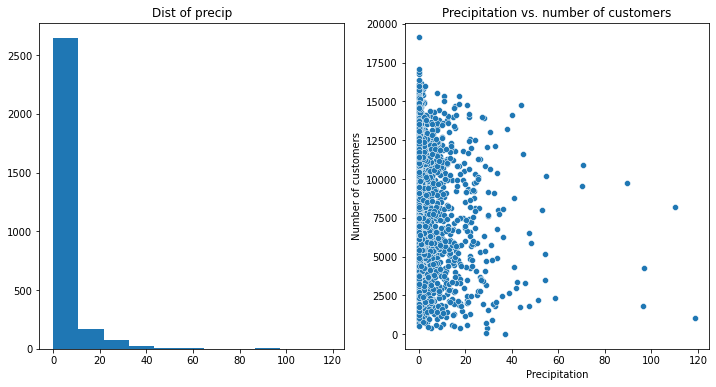

In [60]:
# plot of  distribution of precip
plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
plt.hist(df['precip'], bins=11)
plt.title('Dist of precip')

plt.subplot(1,2,2)
sb.scatterplot(data = df, x = 'precip', y = 'total_cust')
plt.xlabel('Precipitation')
plt.ylabel('Number of customers')
plt.title('Precipitation vs. number of customers');

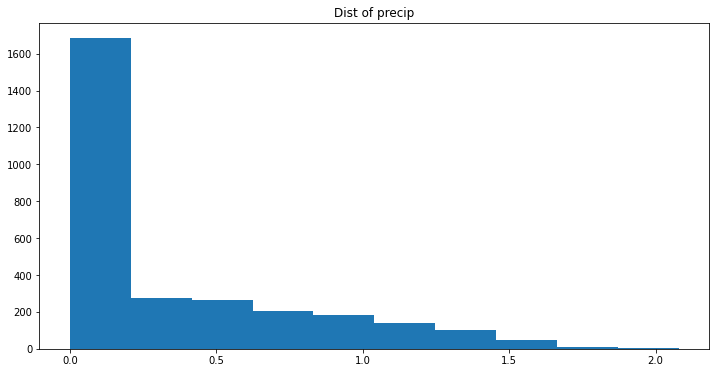

In [61]:
# plotting the distribution of precip
plt.figure(figsize=[12,6])

x = np.log10(df['precip'] + 1)
plt.hist(x)
plt.title('Dist of precip');

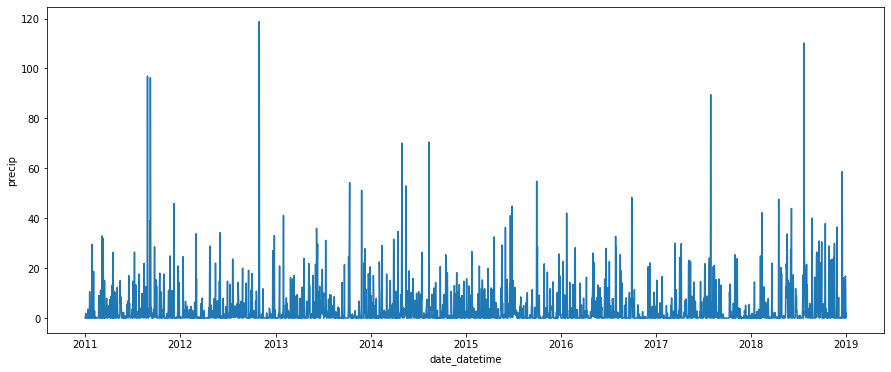

In [62]:
# plot the overall precip values for entire timeseries
plt.figure(figsize=[15,6])
ax = sb.lineplot(x='date_datetime', y='precip', data=df)

##Wind

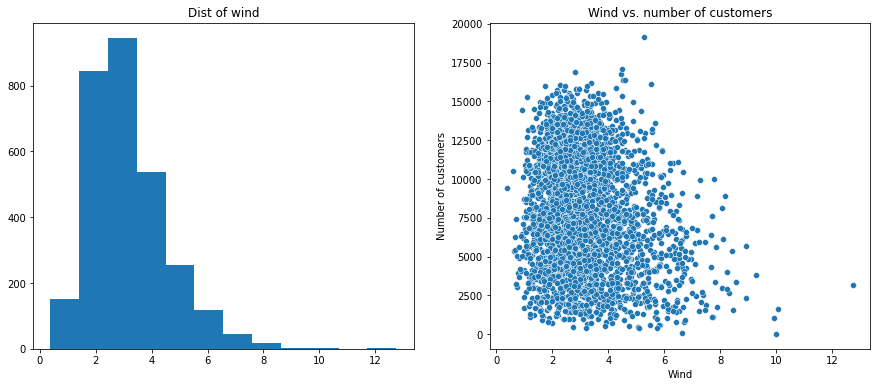

In [63]:
# plot of distribution of wind
plt.figure(figsize=[15,6])

plt.subplot(1,2,1)
plt.hist(df['wind'], bins=12)
plt.title('Dist of wind')

plt.subplot(1,2,2)
sb.scatterplot(data = df, x = 'wind', y = 'total_cust')
plt.xlabel('Wind')
plt.ylabel('Number of customers')
plt.title('Wind vs. number of customers');

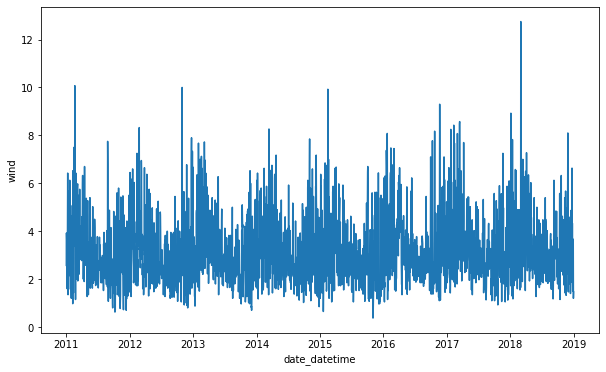

In [64]:
# plot of overall wind for entire time
plt.figure(figsize=[10,6])
ax = sb.lineplot(x='date_datetime', y='wind', data=df)

**DATA PREPERATION:**

In [65]:

df.drop(columns=['temp_observ', 'weekday'], axis=1, inplace=True)

df.drop(columns=['date_datetime'], inplace=True)

Creating new features

In [67]:

window = 8
#  new categorical temp features
df_cat = df[['temp_max']].copy()
df_cat['very_cold'] = df_cat['temp_max'].apply(lambda x: 1 if x < 0 else 0)
df_cat['cold'] = df_cat['temp_max'].apply(lambda x: 1 if x < 10 and x >= 0 else 0)
df_cat['cool'] = df_cat['temp_max'].apply(lambda x: 1 if x < 20 and x >= 10 else 0)
df_cat['warm'] = df_cat['temp_max'].apply(lambda x: 1 if x < 30 and x >= 20 else 0)
df_cat['hot'] = df_cat['temp_max'].apply(lambda x: 1 if x >= 30 else 0)

df_cat[['very_cold', 'cold', 'cool', 'warm', 'hot']] = df_cat[['very_cold', 'cold', 'cool', 'warm', 'hot']].shift()

df_cat.drop(columns=['temp_max'], inplace=True)
# rolling values creation
new_feat = ['wind', 'precip', 'total_cust', 'temp_max', 'temp_min', 'fog', 'ice', 'thunder', 'sleet']

temp_df = pd.DataFrame()

for col in new_feat:
    col_mean = df[col].rolling(window).mean()[(window-1):-1]
    col_std = df[col].rolling(window).std()[(window-1):-1]
    temp_df[col+'_mean'+str(window)] = col_mean.values
    temp_df[col+'_std'+str(window)] = col_std.values

new_bike_df = df.iloc[window:,:]
bike_df_cat =df_cat.iloc[window:,:]
new_bike_df.reset_index(drop=True, inplace=True)
bike_df_cat.reset_index(drop=True, inplace=True)
new_bike_df.head()

,temp_min,temp_max,precip,wind,total_cust,holiday,season_spring,season_summer,season_fall,weekday_1,...,weekday_3,weekday_4,weekday_5,weekday_6,working_day,fog,thunder,ice,sleet,total_cust_t-1
0,-6.293333,0.226667,0.283529,6.425,802.0,0.0,1,0,0,0,...,0,0,0,1,0.0,1,0.0,0,0,939.0
1,-6.238462,0.507692,0.000000,2.975,1298.0,0.0,1,0,0,0,...,0,0,0,0,0.0,1,0.0,0,0,802.0
2,-5.914286,0.564286,0.460241,1.350,1231.0,0.0,1,0,0,1,...,0,0,0,0,1.0,1,0.0,1,1,1298.0
3,-5.114286,0.192857,3.526882,5.675,1141.0,0.0,1,0,0,0,...,0,0,0,0,1.0,1,0.0,0,1,1231.0
4,-4.600000,1.035714,0.000000,5.025,1383.0,0.0,1,0,0,0,...,1,0,0,0,1.0,1,0.0,0,0,1141.0


In [70]:
# drop some columns (look ahead bias)
new_bike_df.drop(columns=['temp_max', 'wind', 'temp_min', 'precip', 'thunder', 'fog', 'ice', 'sleet'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [71]:
# merging both dataframes with features
final_df = new_bike_df.join(temp_df, how='left')
final_df = final_df.join(bike_df_cat, how='left')
final_df.head()

,total_cust,holiday,season_spring,season_summer,season_fall,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,...,ice_std8,thunder_mean8,thunder_std8,sleet_mean8,sleet_std8,very_cold,cold,cool,warm,hot
0,802.0,0.0,1,0,0,0,0,0,0,0,...,0.353553,0.0,0.0,0.375,0.517549,0.0,1.0,0.0,0.0,0.0
1,1298.0,0.0,1,0,0,0,0,0,0,0,...,0.353553,0.0,0.0,0.375,0.517549,0.0,1.0,0.0,0.0,0.0
2,1231.0,0.0,1,0,0,1,0,0,0,0,...,0.353553,0.0,0.0,0.375,0.517549,0.0,1.0,0.0,0.0,0.0
3,1141.0,0.0,1,0,0,0,1,0,0,0,...,0.462910,0.0,0.0,0.500,0.534522,0.0,1.0,0.0,0.0,0.0
4,1383.0,0.0,1,0,0,0,0,1,0,0,...,0.462910,0.0,0.0,0.625,0.517549,0.0,1.0,0.0,0.0,0.0


Assigning X and y

In [72]:
# X and y
y = final_df['total_cust']
X = final_df.drop(columns=['total_cust'])

 Creating transformation classes

In [73]:
# ML pipeline
class Debug(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        self.shape = X.shape
        print(self.shape)
        X_df = pd.DataFrame(X)
        print(X_df)
        return X

Baseline model: naive univariate prediction

In [74]:
# X and y 
y_naive = (final_df['total_cust'].copy())
X_naive = y_naive.copy()
X_naive = pd.DataFrame(data=X_naive, columns=['total_cust'])
#  start time
start_time = datetime.now()
#  y_pred
y_pred = (X_naive.shift())[1:]
# adjusting length 
y_naive = y_naive[1:]
#final time
end_time = datetime.now()
print('Total running time of naive predictor:', (end_time - start_time).total_seconds())
print('RMSLE:', np.sqrt(mean_squared_log_error(y_naive, y_pred)))
print('MAE:', mean_absolute_error(y_naive, y_pred))

Total running time of naive predictor: 0.000524
RMSLE: 0.40731742102103863
MAE: 1403.2437349811191


Preparation code for using differenced y for predictions

In [75]:
y_log = final_df[['total_cust']].copy()
y_log['total_cust'] = y_log['total_cust'].apply(lambda x: np.log1p(x+1))
y_shift = y_log.shift(1)
y_diff = (y_log - y_shift)[1:]
X_diff = X[1:]

y_diff.reset_index(drop=True, inplace=True)
X_diff.reset_index(drop=True, inplace=True)
# initializing the model which is a Random Forest model and uses default hyperparameters
model_rf_diff = RandomForestRegressor(random_state=42)
#  ML pipeline
trend_features = ['total_cust_mean'+str(window), 'total_cust_std'+str(window), 'total_cust_t-1']

preprocessor = ColumnTransformer([('trend_diff', FunctionTransformer(np.log1p, validate=False), trend_features),], remainder='passthrough')

pipeline = Pipeline([('preprocessor', preprocessor),('model', model_rf_diff)])

pipeline_rf_diff = pipeline.fit(X_diff, y_diff)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [76]:
#timeseries split
time_split = TimeSeriesSplit(n_splits=10)

# cross validation 
scores_rf_diff = cross_validate(pipeline_rf_diff, X_diff, y_diff, cv=time_split,scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'],return_train_score=True, n_jobs=-1)
# root mean squared error
print('Average RMSE train data:', 
      sum([np.sqrt(-1 * x) for x in scores_rf_diff['train_neg_mean_squared_error']])/len(scores_rf_diff['train_neg_mean_squared_error']))
print('Average RMSE test data:',sum([np.sqrt(-1 * x) for x in scores_rf_diff['test_neg_mean_squared_error']])/len(scores_rf_diff['test_neg_mean_squared_error']))

# mean absolute error
print('Average MAE train data:',sum([(-1 * x) for x in scores_rf_diff['train_neg_mean_absolute_error']])/len(scores_rf_diff['train_neg_mean_absolute_error']))
print('Average MAE test data:',sum([(-1 * x) for x in scores_rf_diff['test_neg_mean_absolute_error']])/len(scores_rf_diff['test_neg_mean_absolute_error']))

Average RMSE train data: 0.1325380533135911
Average RMSE test data: 0.3878209838222189
Average MAE train data: 0.0792356652215462
Average MAE test data: 0.2751582654303236


In [77]:
# getting indices 
X_train_over = defaultdict()  
X_test_over = defaultdict()
y_train_over = defaultdict()
y_test_over = defaultdict()
y_test_index = []
y_train_index = []
count = 0
for train_index, test_index in time_split.split(X_diff):
    print("TRAIN:", train_index, "TEST:", test_index)
    y_test_index.append(test_index)
    y_train_index.append(train_index)
    X_train, X_test = X_diff.iloc[train_index], X_diff.iloc[test_index]
    y_train, y_test = (np.array(y_diff))[train_index], (np.array(y_diff))[test_index]
    X_train_over[count] = X_train
    X_test_over[count] = X_test
    y_train_over[count] = y_train
    y_test_over[count] = y_test
    count += 1

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

In [78]:
def split_predict_test(X_train, y_train, X_test, y_test, split):
    
    pipeline_part = pipeline.fit(X_train[split], y_train[split].ravel())
    prediction_test = pipeline_part.predict(X_test[split])
    y_test_pred_log = prediction_test + y_log.iloc[y_test_index[split]]['total_cust']
    y_test_pred = np.exp(y_test_pred_log) - 2

    
    y_test_true_log = y_test[split] + y_log.iloc[y_test_index[split]]
    y_test_true = np.exp(y_test_true_log) - 2 
    rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
    rmsle = np.sqrt(mean_squared_log_error(y_test_true, y_test_pred))
    mae = mean_absolute_error(y_test_true, y_test_pred) 
    list_scores = []
    list_scores.extend([rmse, rmsle, mae])
    return list_scores

def split_predict_train(X_train, y_train, X_test, y_test, split):
    
    pipeline_part = pipeline.fit(X_train[split], y_train[split].ravel())
    prediction_train = pipeline_part.predict(X_train[split])
    y_train_pred_log = prediction_train + y_log.iloc[y_train_index[split]]['total_cust']
    y_train_pred = np.exp(y_train_pred_log) - 2
    y_train_true_log = y_train[split] + y_log.iloc[y_train_index[split]]
    y_train_true = np.exp(y_train_true_log) - 2 
    rmse = np.sqrt(mean_squared_error(y_train_true, y_train_pred))
    rmsle = np.sqrt(mean_squared_log_error(y_train_true, y_train_pred))
    mae = mean_absolute_error(y_train_true, y_train_pred) 
    list_scores = []
    list_scores.extend([rmse, rmsle, mae])
    return list_scores

Random Forest:

In [79]:
def split_predict_test(X_train, y_train, X_test, y_test, split):
    pipeline_part = pipeline.fit(X_train[split], y_train[split].ravel())
    prediction_test = pipeline_part.predict(X_test[split])
    y_test_pred_log = prediction_test + y_log.iloc[y_test_index[split]]['total_cust']
    y_test_pred = np.exp(y_test_pred_log) - 2
    y_test_true_log = y_test[split] + y_log.iloc[y_test_index[split]]
    y_test_true = np.exp(y_test_true_log) - 2 
    rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
    rmsle = np.sqrt(mean_squared_log_error(y_test_true, y_test_pred))
    mae = mean_absolute_error(y_test_true, y_test_pred)
    list_scores = []
    list_scores.extend([rmse, rmsle, mae])
    return list_scores

def split_predict_train(X_train, y_train, X_test, y_test, split):
    
    pipeline_part = pipeline.fit(X_train[split], y_train[split].ravel())
    prediction_train = pipeline_part.predict(X_train[split])
    y_train_pred_log = prediction_train + y_log.iloc[y_train_index[split]]['total_cust']
    y_train_pred = np.exp(y_train_pred_log) - 2
    y_train_true_log = y_train[split] + y_log.iloc[y_train_index[split]]
    y_train_true = np.exp(y_train_true_log) - 2 
    rmse = np.sqrt(mean_squared_error(y_train_true, y_train_pred))
    rmsle = np.sqrt(mean_squared_log_error(y_train_true, y_train_pred))
    mae = mean_absolute_error(y_train_true, y_train_pred)
    list_scores = []
    list_scores.extend([rmse, rmsle, mae])
    return list_scores

In [80]:
# initializing Random Forest model with default hyperparameters
model_rf = RandomForestRegressor(bootstrap=False, random_state=15)
# ML pipeline
trend_features = ['total_cust_mean'+str(window), 'total_cust_std'+str(window), 'total_cust_t-1']
preprocessor = ColumnTransformer([('trend_diff', FunctionTransformer(np.log1p, validate=False), trend_features),], remainder='passthrough')
pipeline = Pipeline([('preprocessor', preprocessor), ('model', model_rf)])
pipeline_rf = pipeline.fit(X, y)

In [81]:

time_split = TimeSeriesSplit(n_splits=10)
# cross validation 
scores_rf = cross_validate(pipeline_rf, X, y, cv=time_split,scoring=['neg_mean_squared_error', 'neg_mean_absolute_error','neg_mean_squared_log_error'],
                         return_train_score=True, n_jobs=-1)
# mean absolute error
print('Random Forests: Average MAE train data:',sum([(-1 * x) for x in scores_rf['train_neg_mean_absolute_error']])/len(scores_rf['train_neg_mean_absolute_error']))
print('Random Forests: Average MAE test data:', sum([(-1 * x) for x in scores_rf['test_neg_mean_absolute_error']])/len(scores_rf['test_neg_mean_absolute_error']))

# root mean squared log error
print('Random Forests: Average RMSLE train data:',sum([(-1 * x) for x in scores_rf['train_neg_mean_squared_log_error']])/len(scores_rf['train_neg_mean_squared_log_error']))
print('Random Forests: Average RMSLE test data:',sum([(-1 * x) for x in scores_rf['test_neg_mean_squared_log_error']])/len(scores_rf['test_neg_mean_squared_log_error']))

Random Forests: Average MAE train data: 0.0
Random Forests: Average MAE test data: 2311.533837121212
Random Forests: Average RMSLE train data: 0.0
Random Forests: Average RMSLE test data: 0.2933674724834663


In [83]:
#trees in random forest
n_estimators = randint(1, 2500)
# maximum number of features
max_features = randint(1, 25)
# maximum number of levels in tree
max_depth = randint(1,15)
# minimum number of samples 
min_samples_leaf = randint(1, 15)
#  random grid
random_grid_rf = {'model__n_estimators': n_estimators,'model__max_depth': max_depth,'model__min_samples_leaf': min_samples_leaf,'model__max_features': max_features}

In [84]:
#  start time
start_time = datetime.now()
print(start_time)
#  randomizedsearch class to the random parameters fitting
rs_rf = RandomizedSearchCV(pipeline_rf, param_distributions=random_grid_rf,scoring='neg_mean_squared_error',n_jobs=-1,cv=time_split,
n_iter = 5,verbose=10,random_state=49)
rs_rf = rs_rf.fit(X, y)
#total running time
end_time = datetime.now()
print('Total running time:', end_time-start_time)

2022-05-19 05:18:12.459068
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Total running time: 0:01:54.167087


In [85]:
fix_best_params_rf = {k[7:]: v for k, v in rs_rf.best_params_.items()}
print(fix_best_params_rf)
# best_params as hyperparameters
model_rf_rs = RandomForestRegressor(**fix_best_params_rf, bootstrap=False)

{'max_depth': 11, 'max_features': 14, 'min_samples_leaf': 9, 'n_estimators': 909}


In [86]:
# ML pipeline
trend_features = ['total_cust_mean'+str(window), 'total_cust_std'+str(window), 'total_cust_t-1']
preprocessor = ColumnTransformer([
    ('trend_diff', FunctionTransformer(np.log1p, validate=False), trend_features),], remainder='passthrough')
pipeline = Pipeline([('preprocessor', preprocessor),('model', model_rf_rs)])
# x and y to the pipeline
pipeline_rf_rs = pipeline.fit(X, y)
#  cross validation 
scores_rf = cross_validate(pipeline_rf_rs, X, y, cv=time_split,scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',neg_mean_squared_log_error'],
                         return_train_score=True, n_jobs=-1)
# absolute mean error
print('Random Forests: Average MAE train data:', 
      sum([(-1 * x) for x in scores_rf['train_neg_mean_absolute_error']])/len(scores_rf['train_neg_mean_absolute_error']))
print('Random Forests: Average MAE test data:', 
      sum([(-1 * x) for x in scores_rf['test_neg_mean_absolute_error']])/len(scores_rf['test_neg_mean_absolute_error']))

# root mean squared log error
print('Random Forests: Average RMSLE train data:', 
      sum([(-1 * x) for x in scores_rf['train_neg_mean_squared_log_error']])/len(scores_rf['train_neg_mean_squared_log_error']))
print('Random Forests: Average RMSLE test data:', 
      sum([(-1 * x) for x in scores_rf['test_neg_mean_squared_log_error']])/len(scores_rf['test_neg_mean_squared_log_error']))

Random Forests: Average MAE train data: 592.268010493808
Random Forests: Average MAE test data: 1589.4317230202967
Random Forests: Average RMSLE train data: 0.07394942349478861
Random Forests: Average RMSLE test data: 0.13602197920518866


In [87]:
#  parameters to be used in gridsearch
param_grid_rf = {'model__max_depth': [10,11],'model__max_features': [19, 20],
                 'model__min_samples_leaf': [6, 7],'model__n_estimators': [1926, 1930]}
#  best parameters to further improve the model
gs_rf = GridSearchCV(pipeline_rf,param_grid=param_grid_rf,scoring='neg_mean_squared_error',verbose = 10,n_jobs=-1,cv=time_split)
gs_rf = gs_rf.fit(X, y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [88]:
fix_best_params_rf = {key[7:]: val for key, val in gs_rf.best_params_.items()}
print(fix_best_params_rf)
#  best_params as hyperparameters
model_rf_tuned = RandomForestRegressor(**fix_best_params_rf, bootstrap=False)

{'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 7, 'n_estimators': 1930}


In [89]:
# ML pipeline
trend_features = ['total_cust_mean'+str(window), 'total_cust_std'+str(window), 'total_cust_t-1']
preprocessor = ColumnTransformer([('trend_diff', FunctionTransformer(np.log1p, validate=False), trend_features),], remainder='passthrough')
pipeline = Pipeline([('preprocessor', preprocessor),('model', model_rf_tuned)])
# fitting x and y to pipeline
pipeline_rf_tuned = pipeline.fit(X, y)
#  start time
start_time = datetime.now()
# cross validation 
scores_rf_tuned = cross_validate(pipeline_rf_tuned, X, y, cv=time_split,scoring=['neg_mean_squared_error', 'neg_mean_absolute_error','neg_mean_squared_log_error'],
                         return_train_score=True, n_jobs=-1)
# total running time
end_time = datetime.now()
print('Total time for random forests:', (end_time-start_time).total_seconds())

Total cross validation time for random forests: 121.847413


In [90]:
# mean absolute error
print('Random Forests: Average MAE train data:', 
      sum([(-1 * x) for x in scores_rf_tuned['train_neg_mean_absolute_error']])/len(scores_rf_tuned['train_neg_mean_absolute_error']))
print('Random Forests: Average MAE test data:', 
      sum([(-1 * x) for x in scores_rf_tuned['test_neg_mean_absolute_error']])/len(scores_rf_tuned['test_neg_mean_absolute_error']))
# root mean squared log error
print('Random Forests: Average RMSLE train data:', 
      sum([(-1 * x) for x in scores_rf_tuned['train_neg_mean_squared_log_error']])/len(scores_rf_tuned['train_neg_mean_squared_log_error']))
print('Random Forests: Average RMSLE test data:', 
      sum([(-1 * x) for x in scores_rf_tuned['test_neg_mean_squared_log_error']])/len(scores_rf_tuned['test_neg_mean_squared_log_error']))


Random Forests: Average MAE train data: 537.0068708806241
Random Forests: Average MAE test data: 1561.8195134413936
Random Forests: Average RMSLE train data: 0.06587140745604396
Random Forests: Average RMSLE test data: 0.13515149402474216


In [91]:
# get the final scores for the differenced data
split = 10
all_scores_test = []
all_scores_train = []

for i in range(split):
    scores_test = split_predict_test(X_train_over, y_train_over, X_test_over, y_test_over, i)
    all_scores_test.append(scores_test)
    scores_train = split_predict_train(X_train_over, y_train_over, X_test_over, y_test_over, i)
    all_scores_train.append(scores_train)
    
rmse_test = []
rmsle_test = []
mae_test = []
rmse_train = []
rmsle_train = []
mae_train = []

for vals in all_scores_test:
    rmse_test.append(vals[0])
    rmsle_test.append(vals[1])
    mae_test.append(vals[2])
    
for vals in all_scores_train:
    rmse_train.append(vals[0])
    rmsle_train.append(vals[1])
    mae_train.append(vals[2])
    
print('Overall Test RMSLE:', sum(rmsle_test)/split)
print('Overall Test MAE:', sum(mae_test)/split)
print('Overall Train RMSLE:', sum(rmsle_train)/split)
print('Overall Train MAE:', sum(mae_train)/split)
    

Overall Test RMSLE: 0.36683194783055534
Overall Test MAE: 1552.872784574553
Overall Train RMSLE: 0.2597427680728062
Overall Train MAE: 707.7696029844108


In [95]:
weekday_feats = ['weekday_3', 'weekday_1', 'weekday_2', 'weekday_4', 'weekday_5', 'weekday_6']
X_feat_imp = X.drop(columns=weekday_feats)
#ML pipeline
trend_features = ['total_cust_mean'+str(window), 'total_cust_std'+str(window)]
preprocessor = ColumnTransformer([
    ('trend_diff', FunctionTransformer(np.log1p, validate=False), trend_features),
], remainder='passthrough')
pipeline = Pipeline([('preprocessor', preprocessor),('model', model_rf_tuned)])
#  x and y to pipeline
pipeline_rf_tuned = pipeline.fit(X_feat_imp, y)
# cross validation 
scores_rf_tuned = cross_validate(pipeline_rf_tuned, X_feat_imp, y, cv=time_split,scoring=['neg_mean_squared_error', 'neg_mean_absolute_error','neg_mean_squared_log_error'],
                         return_train_score=True, n_jobs=-1)
# mean absolute error
print('Random Forests: Average MAE train data:', 
      sum([(-1 * x) for x in scores_rf_tuned['train_neg_mean_absolute_error']])/len(scores_rf_tuned['train_neg_mean_absolute_error']))
print('Random Forests: Average MAE test data:', 
      sum([(-1 * x) for x in scores_rf_tuned['test_neg_mean_absolute_error']])/len(scores_rf_tuned['test_neg_mean_absolute_error']))

# root mean squared log error
print('Random Forests: Average RMSLE train data:', 
      sum([(-1 * x) for x in scores_rf_tuned['train_neg_mean_squared_log_error']])/len(scores_rf_tuned['train_neg_mean_squared_log_error']))
print('Random Forests: Average RMSLE test data:', 
      sum([(-1 * x) for x in scores_rf_tuned['test_neg_mean_squared_log_error']])/len(scores_rf_tuned['test_neg_mean_squared_log_error']))

Random Forests: Average MAE train data: 538.1142161219784
Random Forests: Average MAE test data: 1568.8058158252738
Random Forests: Average RMSLE train data: 0.0653142365220165
Random Forests: Average RMSLE test data: 0.13639050719922413


##ADABOOST

In [96]:
# initializing 
model_ada = AdaBoostRegressor(random_state=40, base_estimator=DecisionTreeRegressor())
# ML pipeline
trend_features = ['total_cust_mean'+str(window), 'total_cust_std'+str(window), 'total_cust_t-1']
preprocessor = ColumnTransformer([('trend_diff', FunctionTransformer(np.log1p, validate=False), trend_features),
], remainder='passthrough')

pipeline = Pipeline([('preprocessor', preprocessor),('model', model_ada)])
pipeline_ada = pipeline.fit(X, y)
time_split = TimeSeriesSplit(n_splits=10)

#cross validation
scores_ada = cross_validate(pipeline_ada, X, y, cv=time_split,scoring=['neg_mean_squared_error', 'neg_mean_absolute_error','neg_mean_squared_log_error'],return_train_score=True, n_jobs=-1)
# mean absolute error
print('AdaBoost: Average MAE train data:', 
      sum([(-1 * x) for x in scores_ada['train_neg_mean_absolute_error']])/len(scores_ada['train_neg_mean_absolute_error']))
print('AdaBoost: Average MAE test data:', 
      sum([(-1 * x) for x in scores_ada['test_neg_mean_absolute_error']])/len(scores_ada['test_neg_mean_absolute_error']))
# root mean squared log error
print('AdaBoost: Average RMSLE train data:', 
      sum([np.sqrt(-1 * x) for x in scores_ada['train_neg_mean_squared_log_error']])/len(scores_ada['train_neg_mean_squared_log_error']))
print('AdaBoost: Average RMSLE test data:', 
      sum([np.sqrt(-1 * x) for x in scores_ada['test_neg_mean_squared_log_error']])/len(scores_ada['test_neg_mean_squared_log_error']))

AdaBoost: Average MAE train data: 17.529849653254722
AdaBoost: Average MAE test data: 1656.3890151515147
AdaBoost: Average RMSLE train data: 0.031167949082394
AdaBoost: Average RMSLE test data: 0.37713342202524996


Hyperparameter tuning

In [97]:
# estimators in AdaBoost model
n_estimators = randint(100, 1000)
learning_rate = uniform(0.001, 0.05)
# max_depth
max_depth = randint(1, 8)
# Create the random grid
random_grid_ada = {'model__n_estimators': n_estimators,'model__learning_rate': learning_rate,'model__base_estimator__max_depth': max_depth}
# check the start time
start_time = datetime.now()
print(start_time)
# fitting randomizedsearch class to the random parameters
rs_ada = RandomizedSearchCV(pipeline_ada,param_distributions=random_grid_ada,scoring='neg_mean_squared_error',n_jobs=-1,cv=time_split,n_iter = 5,verbose=10,
random_state=40)
rs_ada = rs_ada.fit(X, y)
# total running time
end_time = datetime.now()
print(' running time:', end_time-start_time)

2022-05-19 07:19:27.933503
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Total running time: 0:02:22.658577


In [98]:
fix_best_params_ada = {key[7:]: val for key, val in rs_ada.best_params_.items()}
print(fix_best_params_ada)
max_depth = fix_best_params_ada['base_estimator__max_depth']
# fiting randomforestregressor best para as hyperparameters
model_ada_tuned = AdaBoostRegressor(DecisionTreeRegressor(max_depth=max_depth),learning_rate=fix_best_params_ada['learning_rate'],n_estimators=fix_best_params_ada['n_estimators'])

{'base_estimator__max_depth': 7, 'learning_rate': 0.033200410237672194, 'n_estimators': 265}


In [99]:
# ML pipeline
trend_features = ['total_cust_mean'+str(window), 'total_cust_std'+str(window), 'total_cust_t-1']
preprocessor = ColumnTransformer([('trend_diff', FunctionTransformer(np.log1p, validate=False), trend_features),], remainder='passthrough')
pipeline = Pipeline([('preprocessor', preprocessor),('model', model_ada_tuned)])
pipeline_ada_tuned = pipeline.fit(X, y)
# creating a timeseries split of the datasets
time_split = TimeSeriesSplit(n_splits=10)
# cross validation 
scores_ada_tuned = cross_validate(pipeline_ada_tuned, X, y, cv=time_split,scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                                  'neg_mean_squared_log_error'],
                        return_train_score=True, n_jobs=-1)
# mean absolute error
print('AdaBoost: Average MAE train data:', 
      sum([(-1 * x) for x in scores_ada_tuned['train_neg_mean_absolute_error']])/len(scores_ada_tuned['train_neg_mean_absolute_error']))
print('AdaBoost: Average MAE test data:', 
      sum([(-1 * x) for x in scores_ada_tuned['test_neg_mean_absolute_error']])/len(scores_ada_tuned['test_neg_mean_absolute_error']))
# root mean squared log error
print('AdaBoost: Average RMSLE train data:', 
      sum([np.sqrt(-1 * x) for x in scores_ada_tuned['train_neg_mean_squared_log_error']])/len(scores_ada_tuned['train_neg_mean_squared_log_error']))
print('AdaBoost: Average RMSLEtest data:', 
      sum([np.sqrt(-1 * x) for x in scores_ada_tuned['test_neg_mean_squared_log_error']])/len(scores_ada_tuned['test_neg_mean_squared_log_error']))

AdaBoost: Average MAE train data: 573.417507070537
AdaBoost: Average MAE test data: 1633.8007488932526
AdaBoost: Average RMSLE train data: 0.21052418407849255
AdaBoost: Average RMSLEtest data: 0.37078797787030227


In [100]:
#hyperparameters around the values chosen by randomizedsearch
grid_param_ada = {'model__learning_rate': [0.003, 0.004, 0.0332],'model__n_estimators': [100, 265],'model__base_estimator__max_depth': [5, 6, 7]}
#  the randomizedsearch best parameters 
gs_ada = GridSearchCV(pipeline_ada,param_grid=grid_param_ada,scoring='neg_mean_squared_error',verbose = 10, n_jobs=-1, cv=time_split)
gs_ada = gs_ada.fit(X, y)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


In [101]:
fix_best_params_ada = {key[7:]: val for key, val in gs_ada.best_params_.items()}
print(fix_best_params_ada)
max_depth = fix_best_params_ada['base_estimator__max_depth']
# fit the randomforestregressor with the best_params as hyperparameters
model_ada_tuned = AdaBoostRegressor(DecisionTreeRegressor(max_depth=max_depth),learning_rate=fix_best_params_ada['learning_rate'],n_estimators=fix_best_params_ada['n_estimators'])

{'base_estimator__max_depth': 5, 'learning_rate': 0.003, 'n_estimators': 265}


In [102]:
# ML pipeline
trend_features = ['total_cust_mean'+str(window), 'total_cust_std'+str(window), 'total_cust_t-1']
preprocessor = ColumnTransformer([('trend_diff', FunctionTransformer(np.log1p, validate=False), trend_features),
], remainder='passthrough')
pipeline = Pipeline([('preprocessor', preprocessor),('model', model_ada_tuned)])
pipeline_ada_tuned = pipeline.fit(X, y)
#  timeseries split of the datasets
time_split = TimeSeriesSplit(n_splits=10)
# start time
start_time = datetime.now()
# cross validation 
scores_ada_tuned = cross_validate(pipeline_ada_tuned, X, y, cv=time_split,scoring=['neg_mean_squared_error', 'neg_mean_absolute_error','neg_mean_squared_log_error'],
  return_train_score=True, n_jobs=-1)
#  total running time
end_time = datetime.now()
print('Total cross validation time for AdaBoost:', (end_time-start_time).total_seconds())

Total cross validation time for AdaBoost: 19.644316


In [103]:
# mean average error
print('AdaBoost: Average MAE train data:', 
      sum([(-1 * x) for x in scores_ada_tuned['train_neg_mean_absolute_error']])/len(scores_ada_tuned['train_neg_mean_absolute_error']))
print('AdaBoost: Average MAE test data:', 
      sum([(-1 * x) for x in scores_ada_tuned['test_neg_mean_absolute_error']])/len(scores_ada_tuned['test_neg_mean_absolute_error']))
# root mean squared log error
print('AdaBoost: Average RMSLE train data:', 
      sum([np.sqrt(-1 * x) for x in scores_ada_tuned['train_neg_mean_squared_log_error']])/len(scores_ada_tuned['train_neg_mean_squared_log_error']))
print('AdaBoost: Average RMSLE test data:', 
      sum([np.sqrt(-1 * x) for x in scores_ada_tuned['test_neg_mean_squared_log_error']])/len(scores_ada_tuned['test_neg_mean_squared_log_error']))

AdaBoost: Average MAE train data: 768.8549633770579
AdaBoost: Average MAE test data: 1615.603089994953
AdaBoost: Average RMSLE train data: 0.29796809120934803
AdaBoost: Average RMSLE test data: 0.36922259065531293


In [104]:
#differenced data
split = 10
all_scores_test = []
all_scores_train = []
for i in range(split):
    scores_test = split_predict_test(X_train_over, y_train_over, X_test_over, y_test_over, i)
    all_scores_test.append(scores_test)
    scores_train = split_predict_train(X_train_over, y_train_over, X_test_over, y_test_over, i)
    all_scores_train.append(scores_train)   
rmse_test = []
rmsle_test = []
mae_test = []
rmse_train = []
rmsle_train = []
mae_train = []
for val in all_scores_test:
    rmse_test.append(val[0])
    rmsle_test.append(val[1])
    mae_test.append(val[2])
    
for valin all_scores_train:
    rmse_train.append(val[0])
    rmsle_train.append(val[1])
    mae_train.append(val[2])
print('Overall Test RMSLE:', sum(rmsle_test)/split)
print('Overall Test MAE:', sum(mae_test)/split)
print('Overall Train RMSLE:', sum(rmsle_train)/split)
print('Overall Train MAE:', sum(mae_train)/split)

Overall Test RMSLE: 0.3700706442771366
Overall Test MAE: 1484.4832777423508
Overall Train RMSLE: 0.2970744366457646
Overall Train MAE: 914.574687864672


In [105]:
X_feat_imp = X.drop(columns=['weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'])
# ML pipeline
trend_features = ['total_cust_mean'+str(window), 'total_cust_std'+str(window)]
preprocessor = ColumnTransformer([('trend_diff', FunctionTransformer(np.log1p, validate=False), trend_features),
], remainder='passthrough')
pipeline = Pipeline([('preprocessor', preprocessor),('model', model_ada_tuned)])
pipeline_ada_tuned = pipeline.fit(X_feat_imp, y)
# timeseries 
time_split = TimeSeriesSplit(n_splits=10)
#cross validation 
scores_ada_tuned = cross_validate(pipeline_ada_tuned, X_feat_imp, y, cv=time_split,scoring=['neg_mean_squared_error', 'neg_mean_absolute_error','neg_mean_squared_log_error'],
                         return_train_score=True, n_jobs=-1)
# mean average error
print('AdaBoost: Average MAE train data:', 
      sum([(-1 * x) for x in scores_ada_tuned['train_neg_mean_absolute_error']])/len(scores_ada_tuned['train_neg_mean_absolute_error']))
print('AdaBoost: Average MAE test data:', 
      sum([(-1 * x) for x in scores_ada_tuned['test_neg_mean_absolute_error']])/len(scores_ada_tuned['test_neg_mean_absolute_error']))

# root mean squared log error
print('AdaBoost: Average RMSLE train data:', 
      sum([(-1 * x) for x in scores_ada_tuned['train_neg_mean_squared_log_error']])/len(scores_ada_tuned['train_neg_mean_squared_log_error']))
print('AdaBoost: Average RMSLE test data:', 
      sum([(-1 * x) for x in scores_ada_tuned['test_neg_mean_squared_log_error']])/len(scores_ada_tuned['test_neg_mean_squared_log_error']))

AdaBoost: Average MAE train data: 768.5857067679257
AdaBoost: Average MAE test data: 1614.442318270478
AdaBoost: Average RMSLE train data: 0.09104118635661831
AdaBoost: Average RMSLE test data: 0.141660414147903


##XGBOOST

In [106]:
# default hyperparameters
model_xgb = xgb.XGBRegressor(random_state=42)
# ML pipeline
trend_features = ['total_cust_mean'+str(window), 'total_cust_std'+str(window), 'total_cust_t-1']
preprocessor = ColumnTransformer([('trend_diff', FunctionTransformer(np.log1p, validate=False), trend_features),], remainder='passthrough')
pipeline = Pipeline([('preprocessor', preprocessor),('scaler', MinMaxScaler()),('model', model_xgb)])
pipeline_xgb = pipeline.fit(X, y)

[07:57:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [107]:
#timeseries split
time_split = TimeSeriesSplit(n_splits=10)
#  cross validation 
scores_xgb = cross_validate(pipeline_xgb, X, y, cv=time_split,scoring=['neg_mean_squared_error', 'neg_mean_absolute_error','neg_mean_squared_log_error'],
                         return_train_score=True, n_jobs=-1)
# mean absolute error
print('XGBoost: Average MAE train data:', 
      sum([(-1 * x) for x in scores_xgb['train_neg_mean_absolute_error']])/len(scores_xgb['train_neg_mean_absolute_error']))
print('XGBoost: Average MAE test data:', 
      sum([(-1 * x) for x in scores_xgb['test_neg_mean_absolute_error']])/len(scores_xgb['test_neg_mean_absolute_error']))

# root mean squared log error
print('XGBoost: Average RMSLE train data:',sum([np.sqrt(-1 * x) for x in scores_xgb['train_neg_mean_squared_log_error']])/len(scores_xgb['train_neg_mean_squared_log_error']))
print('XGBoost: Average RMSLE test data:',sum([np.sqrt(-1 * x) for x in scores_xgb['test_neg_mean_squared_log_error']])/len(scores_xgb['test_neg_mean_squared_log_error']))

XGBoost: Average MAE train data: 677.1416830813813
XGBoost: Average MAE test data: 1662.0827627933384
XGBoost: Average RMSLE train data: 0.27789798511902875
XGBoost: Average RMSLE test data: 0.3774053709011771


In [109]:
alpha = uniform(0.4, 0.6)
learning_rate = uniform(0, 1)
colsample_bytree = uniform(0, 1)
n_estimators = randint(400, 1200)
min_child_weight = randint(6, 15)
max_depth = randint(1, 5)
# Create the random grid
random_grid_xgb = {'model__n_estimators': n_estimators,'model__learning_rate': learning_rate,'model__reg_alpha': alpha,'model__colsample_bytree': colsample_bytree,'model__min_child_weight': min_child_weight,
                   'model__max_depth': max_depth}   
# check the start time
start_time = datetime.now()
print(start_time)
# instantiate and fit the randomizedsearch class to the random parameters
rs_xgb = RandomizedSearchCV(pipeline_xgb,param_distributions=random_grid_xgb,scoring='neg_mean_squared_error',n_jobs=-1,cv=time_split,n_iter = 10,verbose=10,random_state=10)
rs_xgb = rs_xgb.fit(X, y)
# print the total running time
end_time = datetime.now()
print('Total running time:', end_time-start_time)

2022-05-19 08:18:41.669871
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[08:19:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Total running time: 0:00:56.787890


In [110]:
fix_best_params_xgb = {key[7:]: val for key, val in rs_xgb.best_params_.items()}
print(fix_best_params_xgb)
#randomforestregressor best_params as hyperparameters
model_xgb_rs = xgb.XGBRegressor(**fix_best_params_xgb)

{'colsample_bytree': 0.43998745550429186, 'learning_rate': 0.12195414712716746, 'max_depth': 1, 'min_child_weight': 7, 'n_estimators': 772, 'reg_alpha': 0.5834400246175018}


In [111]:
# ML pipeline
trend_features = ['total_cust_mean'+str(window), 'total_cust_std'+str(window), 'total_cust_t-1']
preprocessor = ColumnTransformer([('trend_diff', FunctionTransformer(np.log1p, validate=False), trend_features),
], remainder='passthrough')
pipeline = Pipeline([('preprocessor', preprocessor),('scaler', MinMaxScaler()),('model', model_xgb_rs)])
pipeline_xgb_rs = pipeline.fit(X, y)

[08:21:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [112]:
# creating a timeseries split of the datasets
time_split = TimeSeriesSplit(n_splits=10)
# doing cross validation on the chunks of data and calculating scores
scores_xgb_rs = cross_validate(pipeline_xgb_rs, X, y, cv=time_split,
                         scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                                  'neg_mean_squared_log_error'],
                         return_train_score=True, n_jobs=-1)
# mean absolute error
print('XGBoost: Average MAE train data:', 
      sum([(-1 * x) for x in scores_xgb_rs['train_neg_mean_absolute_error']])/len(scores_xgb_rs['train_neg_mean_absolute_error']))
print('XGBoost: Average MAE test data:', 
      sum([(-1 * x) for x in scores_xgb_rs['test_neg_mean_absolute_error']])/len(scores_xgb_rs['test_neg_mean_absolute_error']))
# root mean squared log error
print('XGBoost: Average RMSLE train data:', 
      sum([np.sqrt(-1 * x) for x in scores_xgb_rs['train_neg_mean_squared_log_error']])/len(scores_xgb_rs['train_neg_mean_squared_log_error']))
print('XGBoost: Average RMSLE test data:', 
      sum([np.sqrt(-1 * x) for x in scores_xgb_rs['test_neg_mean_squared_log_error']])/len(scores_xgb_rs['test_neg_mean_squared_log_error']))

XGBoost: Average MAE train data: 776.3492754902472
XGBoost: Average MAE test data: 1497.186180970163
XGBoost: Average RMSLE train data: 0.3073249343037578
XGBoost: Average RMSLE test data: 0.3573239034238834


In [114]:
#  hyperparameters for  randomizedsearch
grid_param_xgb = {'model__n_estimators': [664, 650],
                   'model__learning_rate': [0.35, 0.04],
                   'model__alpha': [0.636, 0.6],
                   'model__colsample_bytree': [0.85, 0.9],
                   'model__min_child_weight': [7, 8],
                   'model__max_depth': [1, 2]}
gs_xgb = GridSearchCV(pipeline_xgb, 
                  param_grid=grid_param_xgb, 
                  scoring='neg_mean_squared_error', 
                  verbose = 10,n_jobs=-1,cv=time_split)
gs_xgb = gs_xgb.fit(X, y)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[08:33:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [115]:
fix_best_params_xgb = {key[7:]: val for key, val in gs_xgb.best_params_.items()}
print(fix_best_params_xgb)
# best_params as hyperparameters
model_xgb_tuned = xgb.XGBRegressor(**fix_best_params_xgb)

{'alpha': 0.636, 'colsample_bytree': 0.9, 'learning_rate': 0.04, 'max_depth': 1, 'min_child_weight': 8, 'n_estimators': 650}


In [116]:
#ML pipeline
trend_features = ['total_cust_mean'+str(window), 'total_cust_std'+str(window), 'total_cust_t-1']
preprocessor = ColumnTransformer([
    ('trend_diff', FunctionTransformer(np.log1p, validate=False), trend_features),
], remainder='passthrough')
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler()),
    ('model', model_xgb_tuned)])
pipeline_xgb_tuned = pipeline.fit(X, y)

[08:36:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [117]:
#timeseries split
time_split = TimeSeriesSplit(n_splits=10)
#start time
start_time = datetime.now()
#  cross validation
scores_xgb_tuned = cross_validate(pipeline_xgb_tuned, X, y, cv=time_split,
                         scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                                  'neg_mean_squared_log_error'],
                         return_train_score=True, n_jobs=-1)
#total running time
end_time = datetime.now()
print('Total cross validation time for XGBBoost:', (end_time-start_time).total_seconds())

Total cross validation time for XGBBoost: 6.517639


In [118]:
# mean absolute error
print('XGBoost: Average MAE train data:', 
      sum([(-1 * x) for x in scores_xgb_tuned['train_neg_mean_absolute_error']])/len(scores_xgb_tuned['train_neg_mean_absolute_error']))
print('XGBoost: Average MAE test data:', 
      sum([(-1 * x) for x in scores_xgb_tuned['test_neg_mean_absolute_error']])/len(scores_xgb_tuned['test_neg_mean_absolute_error']))
# root mean squared log error
print('XGBoost: Average RMSLE train data:', 
      sum([np.sqrt(-1 * x) for x in scores_xgb_tuned['train_neg_mean_squared_log_error']])/len(scores_xgb_tuned['train_neg_mean_squared_log_error']))
print('XGBoost: Average RMSLE test data:', 
      sum([np.sqrt(-1 * x) for x in scores_xgb_tuned['test_neg_mean_squared_log_error']])/len(scores_xgb_tuned['test_neg_mean_squared_log_error']))

XGBoost: Average MAE train data: 811.669524221715
XGBoost: Average MAE test data: 1489.6067791100704
XGBoost: Average RMSLE train data: 0.31890277455647664
XGBoost: Average RMSLE test data: 0.3561262136348738


In [119]:
split = 10
all_scores_test = []
all_scores_train = []

for i in range(split):
    scores_test = split_predict_test(X_train_over, y_train_over, X_test_over, y_test_over, i)
    all_scores_test.append(scores_test)
    scores_train = split_predict_train(X_train_over, y_train_over, X_test_over, y_test_over, i)
    all_scores_train.append(scores_train)   
rmse_test = []
rmsle_test = []
mae_test = []
rmse_train = []
rmsle_train = []
mae_train = []
for vals in all_scores_test:
    rmse_test.append(vals[0])
    rmsle_test.append(vals[1])
    mae_test.append(vals[2])   
for vals in all_scores_train:
    rmse_train.append(vals[0])
    rmsle_train.append(vals[1])
    mae_train.append(vals[2])
print('Overall Test RMSLE:', sum(rmsle_test)/split)
print('Overall Test MAE:', sum(mae_test)/split)
print('Overall Train RMSLE:', sum(rmsle_train)/split)
print('Overall Train MAE:', sum(mae_train)/split)
    

[08:37:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:37:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:37:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:37:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:37:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:37:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:37:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:37:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [120]:
X_feat_imp = X.drop(columns=['weekday_1', 'weekday_3', 'weekday_4', 'weekday_6','hot', 'cold', 'cool', 'warm'])
# ML pipeline
trend_features = ['total_cust_mean'+str(window), 'total_cust_std'+str(window), 'total_cust_t-1']
preprocessor = ColumnTransformer([
    ('trend_diff', FunctionTransformer(np.log1p, validate=False), trend_features),
], remainder='passthrough')
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler()),
    ('model', model_xgb_tuned)])
pipeline_xgb_tuned = pipeline.fit(X_feat_imp, y)

[08:38:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [121]:
# mean absolute error
print('XGBoost: Average MAE train data:', 
      sum([(-1 * x) for x in scores_xgb_tuned['train_neg_mean_absolute_error']])/len(scores_xgb_tuned['train_neg_mean_absolute_error']))
print('XGBoost: Average MAE test data:', 
      sum([(-1 * x) for x in scores_xgb_tuned['test_neg_mean_absolute_error']])/len(scores_xgb_tuned['test_neg_mean_absolute_error']))
# root mean squared log error
print('XGBoost: Average RMSLE train data:', 
      sum([np.sqrt(-1 * x) for x in scores_xgb_tuned['train_neg_mean_squared_log_error']])/len(scores_xgb_tuned['train_neg_mean_squared_log_error']))
print('XGBoost: Average RMSLE test data:', 
      sum([np.sqrt(-1 * x) for x in scores_xgb_tuned['test_neg_mean_squared_log_error']])/len(scores_xgb_tuned['test_neg_mean_squared_log_error']))

XGBoost: Average MAE train data: 811.669524221715
XGBoost: Average MAE test data: 1489.6067791100704
XGBoost: Average RMSLE train data: 0.31890277455647664
XGBoost: Average RMSLE test data: 0.3561262136348738


##Conclusion:
Considering the three machine learning models, the XGBoost model shows the highest accuracy even though compared with the remaining models they are similar in their accuracy by means of comaring their errors. Accuracy can be increased by using better modeling techniques.
